In [3]:
dframe.ex1 = read.table('q1_data.txt',header = TRUE)

In [5]:
str(dframe.ex1)

'data.frame':	453 obs. of  88 variables:
 $ id          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ e2b1        : int  NA NA NA NA NA NA NA 1 1 1 ...
 $ g1b1        : int  0 0 0 0 0 0 NA 0 0 0 ...
 $ i11         : int  NA 8 NA NA 64 1 NA NA 12 13 ...
 $ pcs1        : num  54.2 59.6 58.5 46.6 31.4 ...
 $ mcs1        : num  52.2 41.7 56.8 14.7 40.7 ...
 $ cesd1       : int  7 11 14 44 26 23 NA 18 33 37 ...
 $ indtot1     : int  5 12 99 97 55 12 NA 82 92 104 ...
 $ drugrisk1   : int  0 0 13 0 0 0 NA 0 8 14 ...
 $ sexrisk1    : int  1 0 4 4 4 4 NA 4 4 5 ...
 $ pcrec1      : int  1 0 0 0 0 0 NA 0 0 2 ...
 $ e2b2        : int  NA NA NA 1 NA NA 1 NA NA 2 ...
 $ g1b2        : int  NA NA NA NA 0 NA 0 NA NA 0 ...
 $ i12         : int  NA NA NA NA NA NA 13 NA NA 22 ...
 $ pcs2        : num  NA NA NA 57.6 44.8 ...
 $ mcs2        : num  NA NA NA 23.9 42.4 ...
 $ cesd2       : int  NA NA NA NA 27 NA 47 NA NA 47 ...
 $ indtot2     : int  NA NA NA NA 34 NA 92 NA NA 100 ...
 $ drugrisk2   : int  NA NA NA NA 0 N

In [10]:
#### Select column
df.q1 = dframe.ex1[c('pcs','mcs','female')]

In [11]:
str(df.q1)

'data.frame':	453 obs. of  3 variables:
 $ pcs   : num  58.4 36 74.8 61.9 37.3 ...
 $ mcs   : num  25.11 26.67 6.76 43.97 21.68 ...
 $ female: int  0 0 0 1 0 1 1 0 1 0 ...


In [24]:
df.q1$gender = 'm'

In [25]:
df.q1$gender[which(df.q1$female == 1)] = 'f'

In [26]:
head(df.q1)

,pcs,mcs,female,gender
,<dbl>,<dbl>,<int>,<chr>
1,58.41369,25.111990,0,m
2,36.03694,26.670307,0,m
3,74.80633,6.762923,0,m
4,61.93168,43.967880,1,f
5,37.34558,21.675755,0,m
6,46.47521,55.508991,1,f


In [31]:
library(dplyr)


ERROR: Error: Must group by variables found in `.data`.
* Column `gender` is not found.


In [38]:
mean=group_by(df.q1[c(1,2,4)], gender) %>% summarize_each(funs(mean))
mean

gender,pcs,mcs
<chr>,<dbl>,<dbl>
f,45.01636,28.93896
m,48.98624,32.52331


In [41]:
sd=group_by(df.q1[c(1,2,4)], gender) %>% summarize_each(funs(sd))
sd

gender,pcs,mcs
<chr>,<dbl>,<dbl>
f,10.11369,12.40615
m,10.82679,12.87024


In [50]:
(minval = 0.80*min(df.q1$pcs))  
(maxval = 1.10*max(df.q1$pcs)) 

[1] 11.25943

[1] 82.28696

In [52]:
options(repr.plot.width=15, repr.plot.height=8)

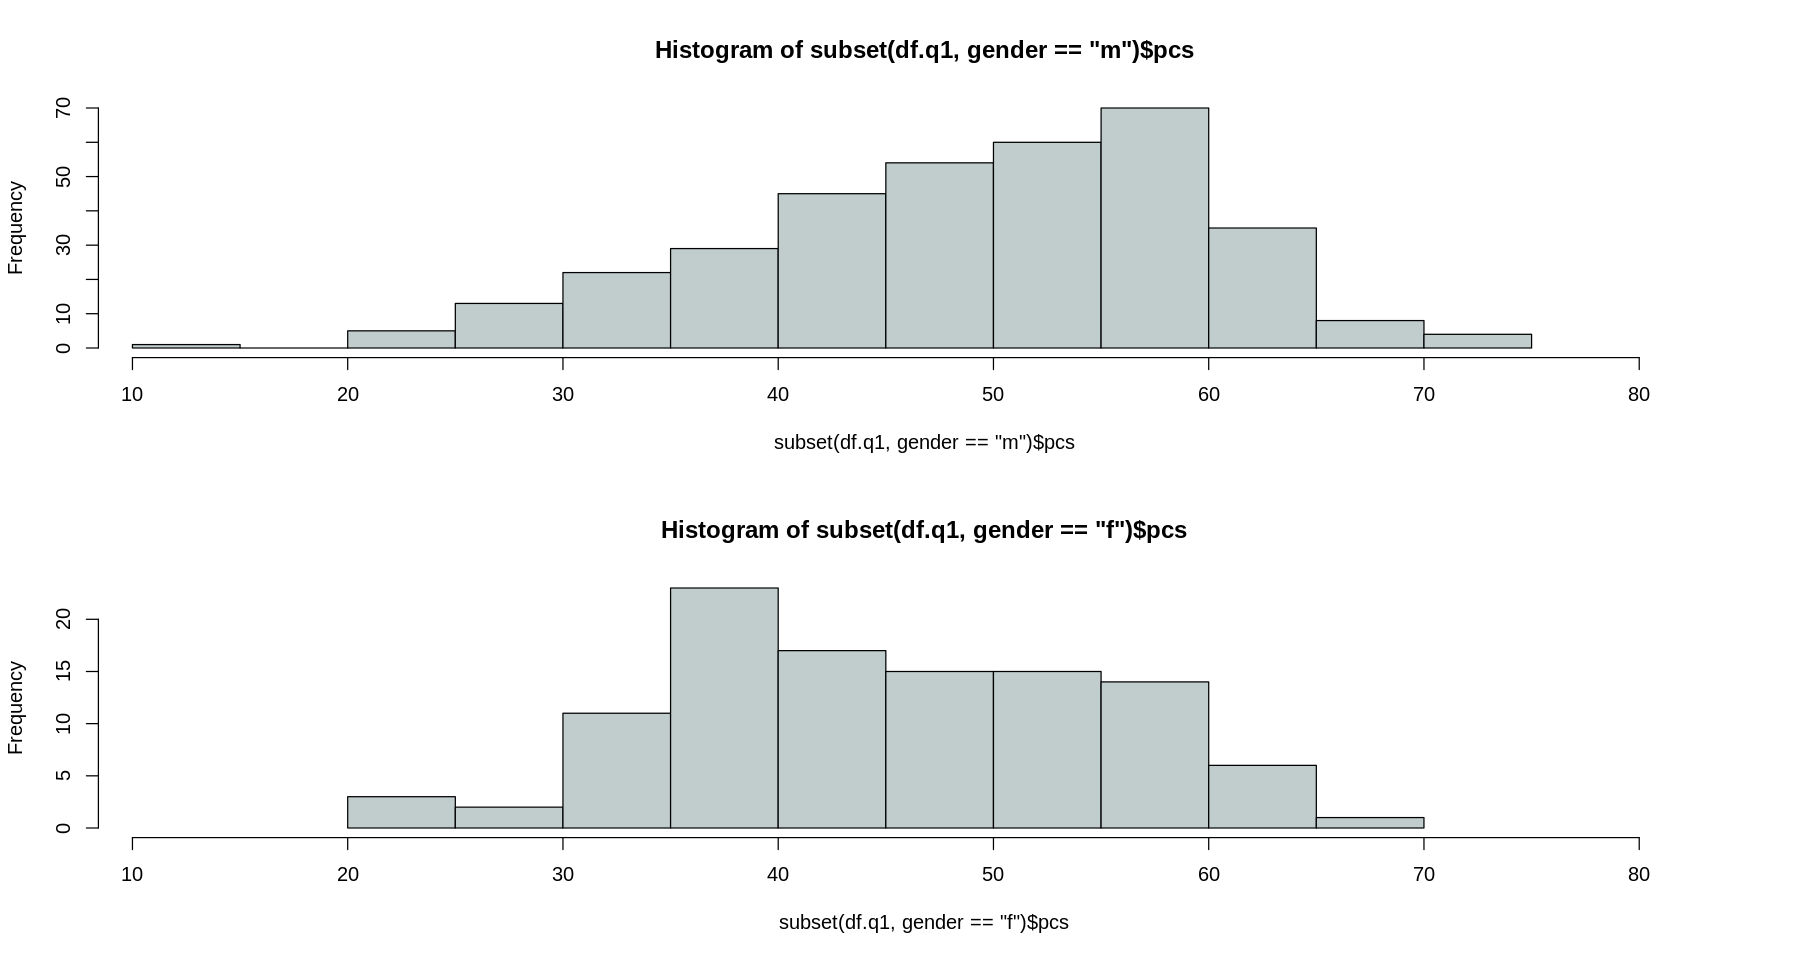

In [58]:
par(mfrow=c(2,1)) 
hist(subset(df.q1,gender=='m')$pcs, col='azure3',
     xlim=c(minval, maxval))
hist(subset(df.q1,gender=='f')$pcs, col='azure3',
     xlim=c(minval, maxval))

In [59]:
(minval = 0.80*min(df.q1$mcs))  
(maxval = 1.10*max(df.q1$mcs)) 

[1] 5.410339

[1] 68.39305

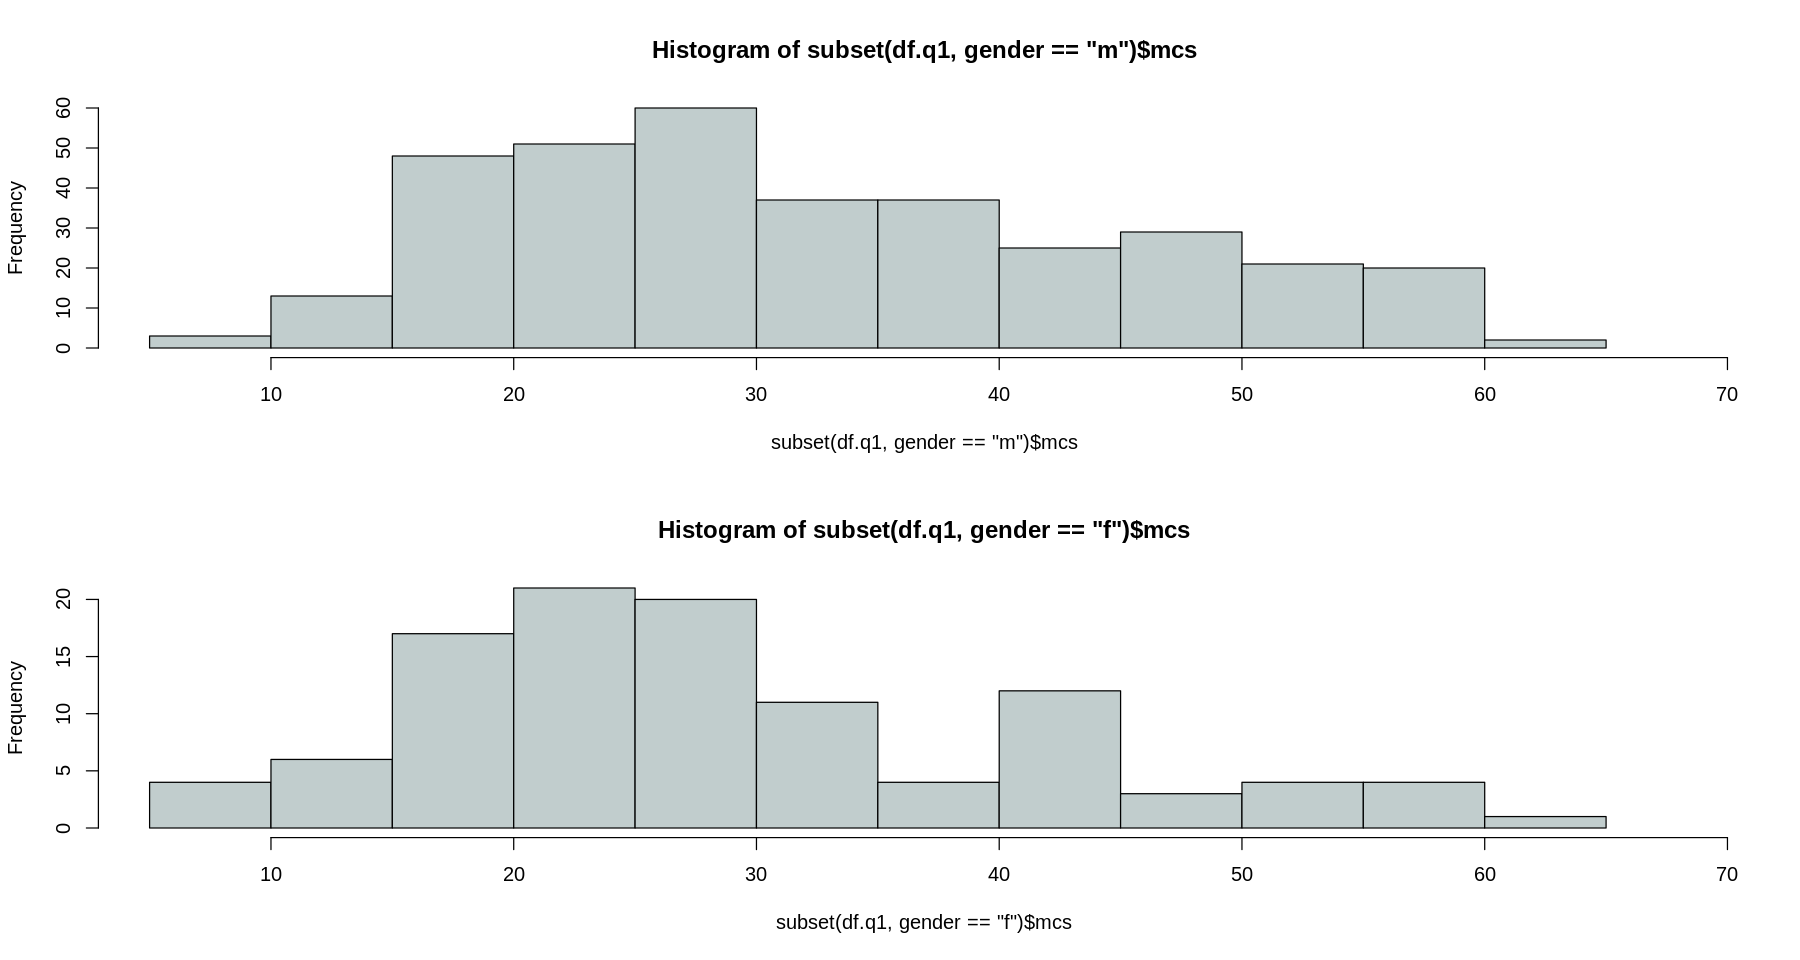

In [60]:
par(mfrow=c(2,1)) 
hist(subset(df.q1,gender=='m')$mcs, col='azure3',
     xlim=c(minval, maxval))
hist(subset(df.q1,gender=='f')$mcs, col='azure3',
     xlim=c(minval, maxval))

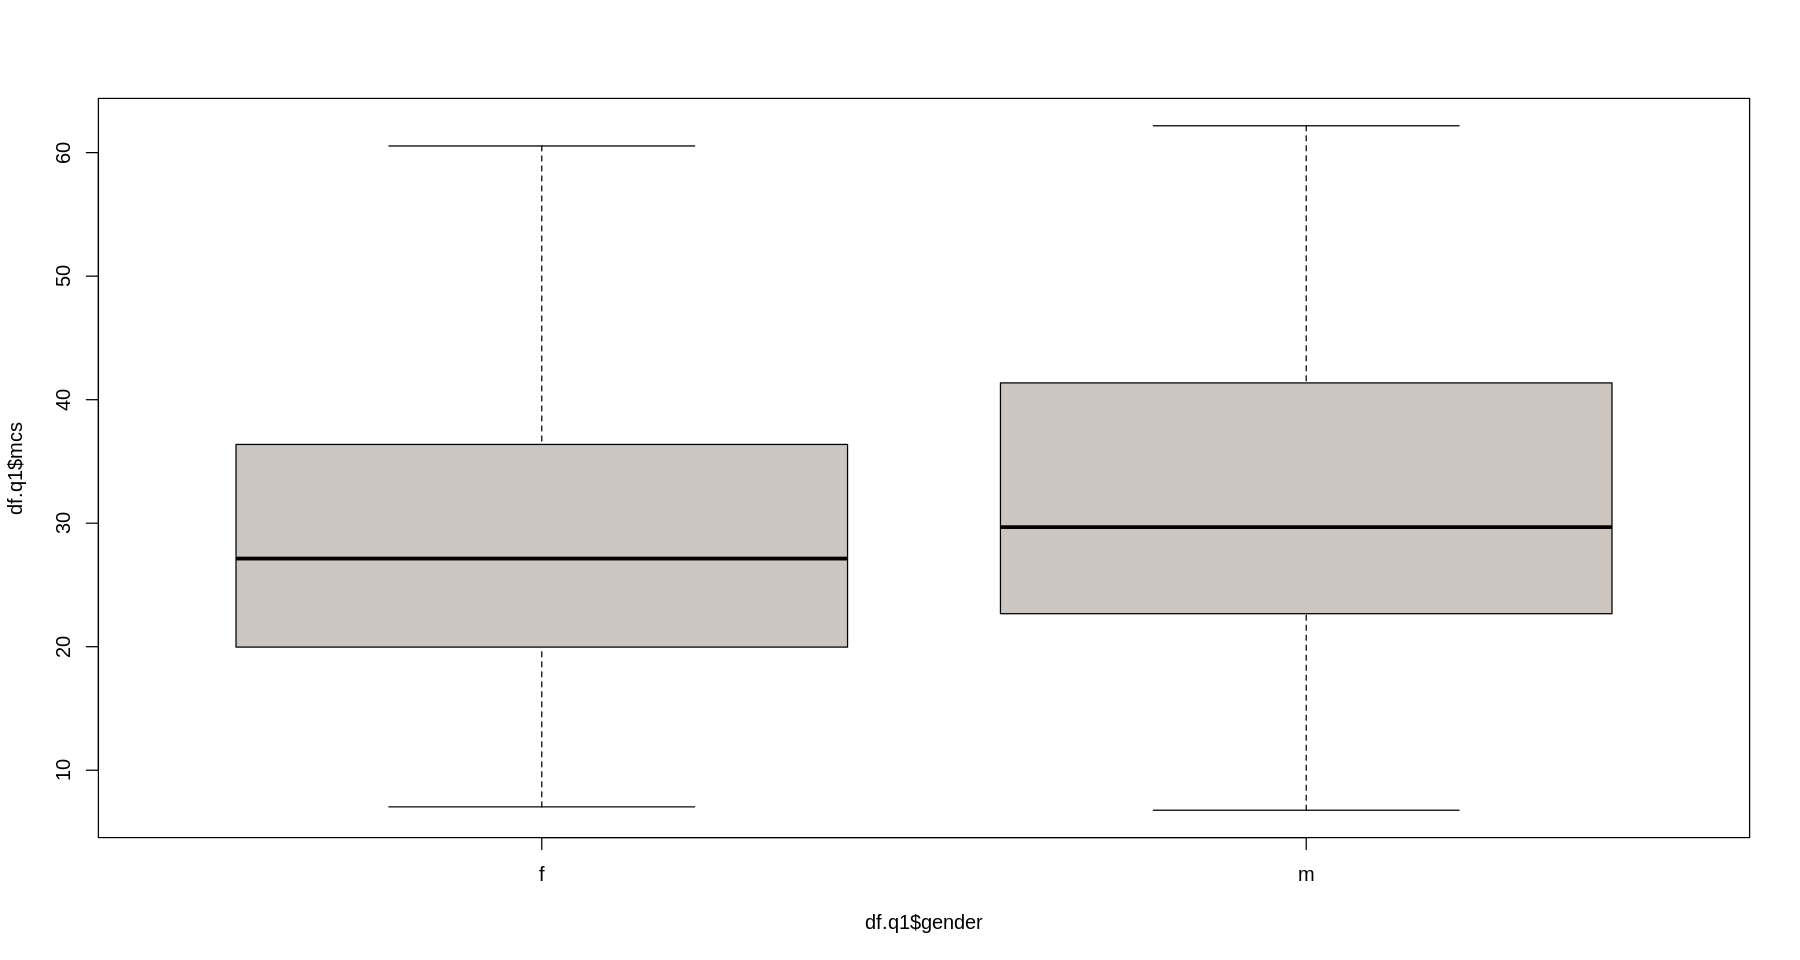

In [62]:
boxplot(df.q1$mcs~df.q1$gender, col='seashell3', 
        main="")

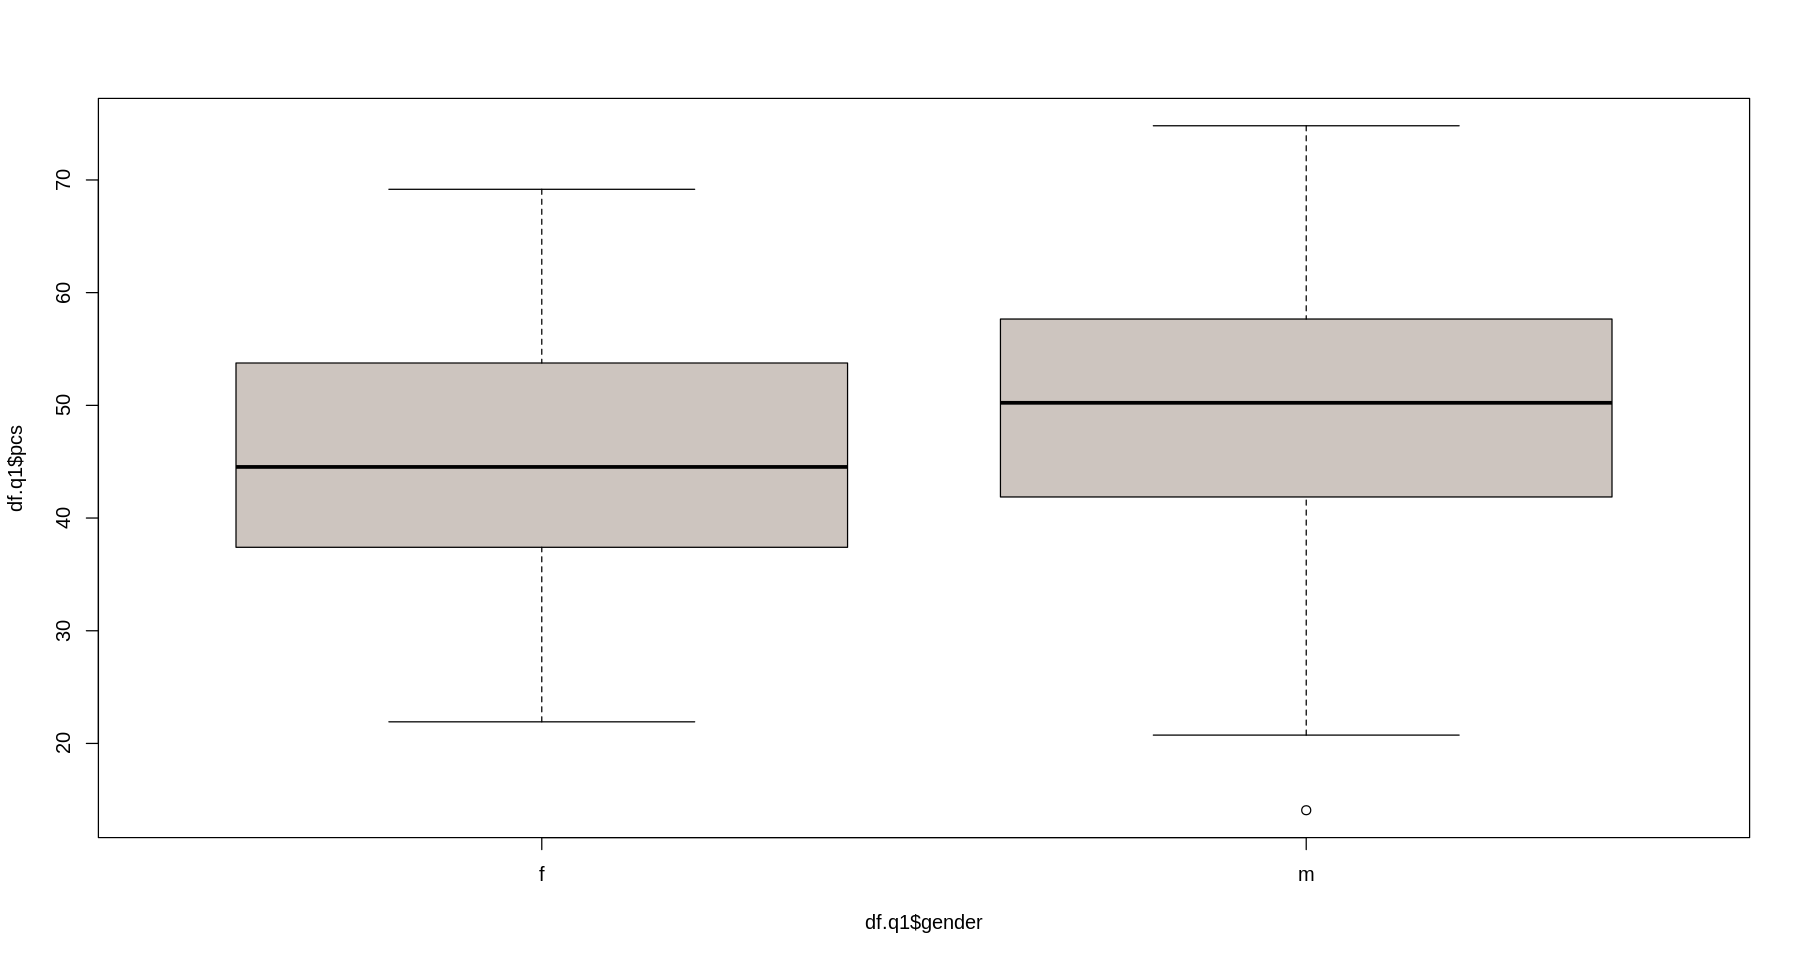

In [63]:
boxplot(df.q1$pcs~df.q1$gender, col='seashell3', 
        main="")

In [64]:
t.test(subset(df.q1,gender=='m')$mcs,subset(df.q1,gender=='f')$mcs)


	Welch Two Sample t-test

data:  subset(df.q1, gender == "m")$mcs and subset(df.q1, gender == "f")$mcs
t = 2.5887, df = 182.1, p-value = 0.01041
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.8523895 6.3163135
sample estimates:
mean of x mean of y 
 32.52331  28.93896 


In [65]:
wilcox.test(subset(df.q1,gender=='m')$mcs,subset(df.q1,gender=='f')$mcs)


	Wilcoxon rank sum test with continuity correction

data:  subset(df.q1, gender == "m")$mcs and subset(df.q1, gender == "f")$mcs
W = 21553, p-value = 0.01017
alternative hypothesis: true location shift is not equal to 0


In [66]:
wilcox.test(subset(df.q1,gender=='m')$pcs,subset(df.q1,gender=='f')$pcs)


	Wilcoxon rank sum test with continuity correction

data:  subset(df.q1, gender == "m")$pcs and subset(df.q1, gender == "f")$pcs
W = 22755, p-value = 0.0003364
alternative hypothesis: true location shift is not equal to 0


In [68]:
t.test(subset(df.q1,gender=='m')$pcs,subset(df.q1,gender=='f')$pcs)


	Welch Two Sample t-test

data:  subset(df.q1, gender == "m")$pcs and subset(df.q1, gender == "f")$pcs
t = 3.4889, df = 187.22, p-value = 0.0006046
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.725196 6.214562
sample estimates:
mean of x mean of y 
 48.98624  45.01636 


In [72]:
Age <-cut(dframe.ex1$age,
      breaks=seq(from=min(dframe.ex1$age), to=max(dframe.ex1$age)+1, length.out=5), 
                labels=c("A1","A2","A3","A4"), right=F )

In [75]:
AgeHomeless = table(Age,dframe.ex1$homeless)

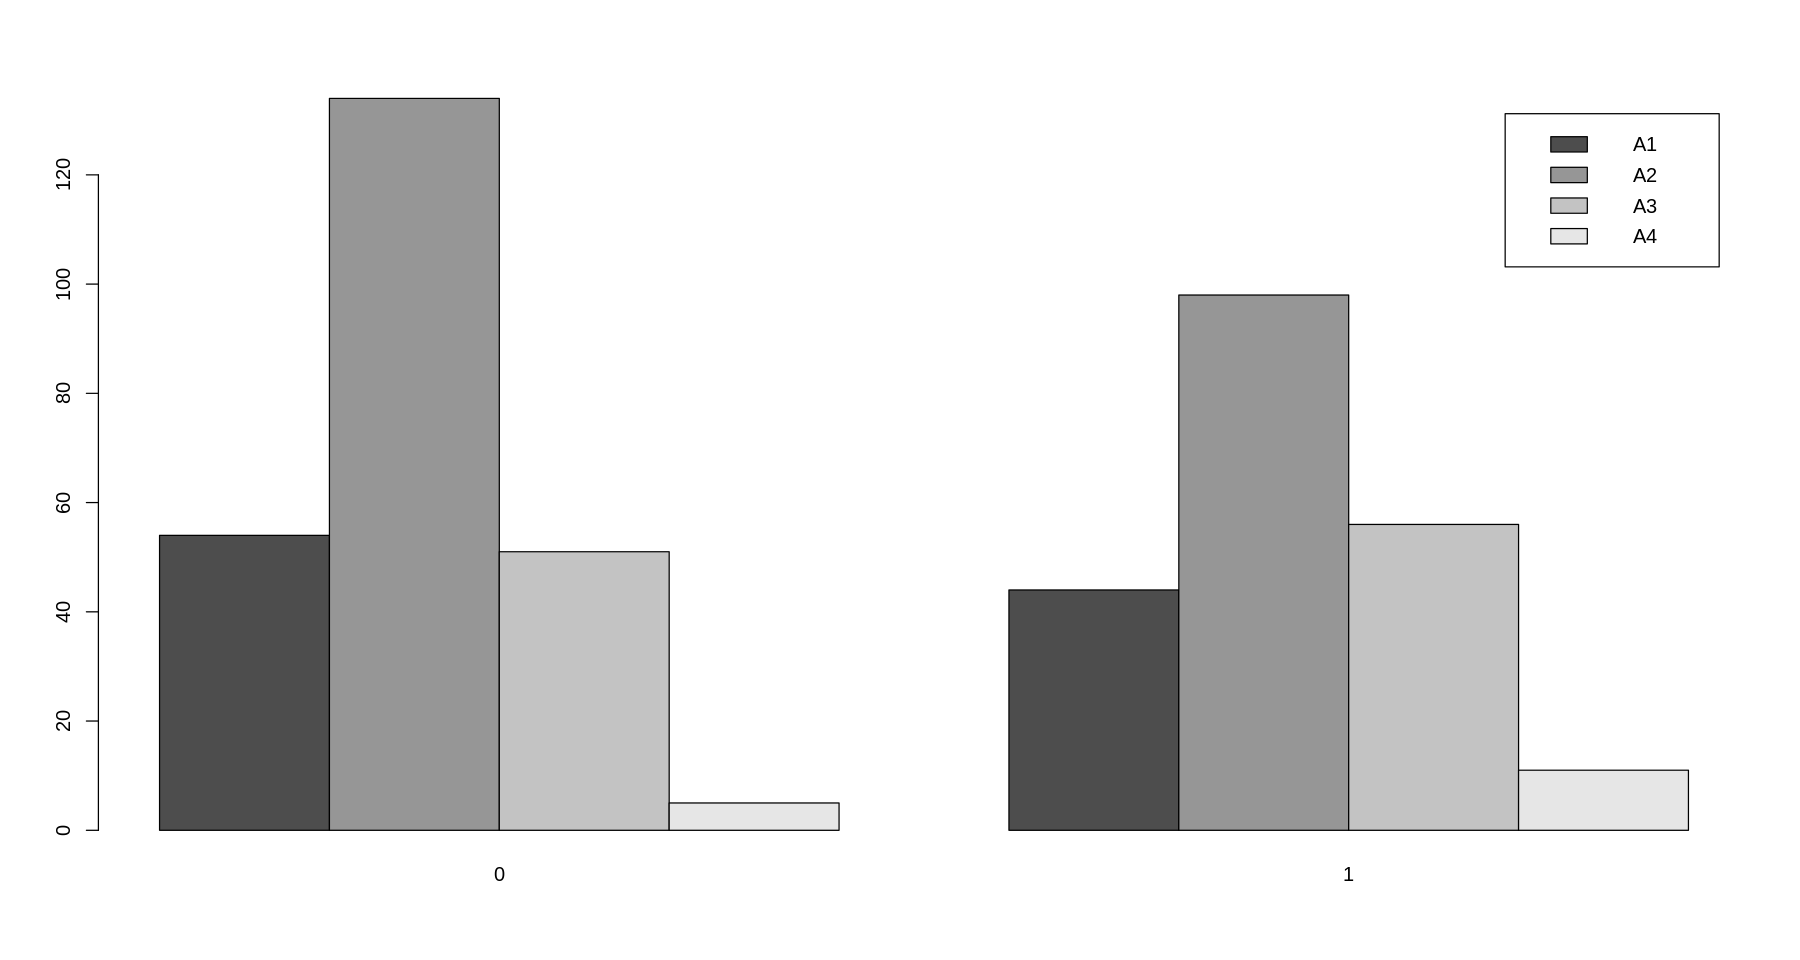

In [77]:
barplot(AgeHomeless, beside = TRUE,   
        legend.text = TRUE)

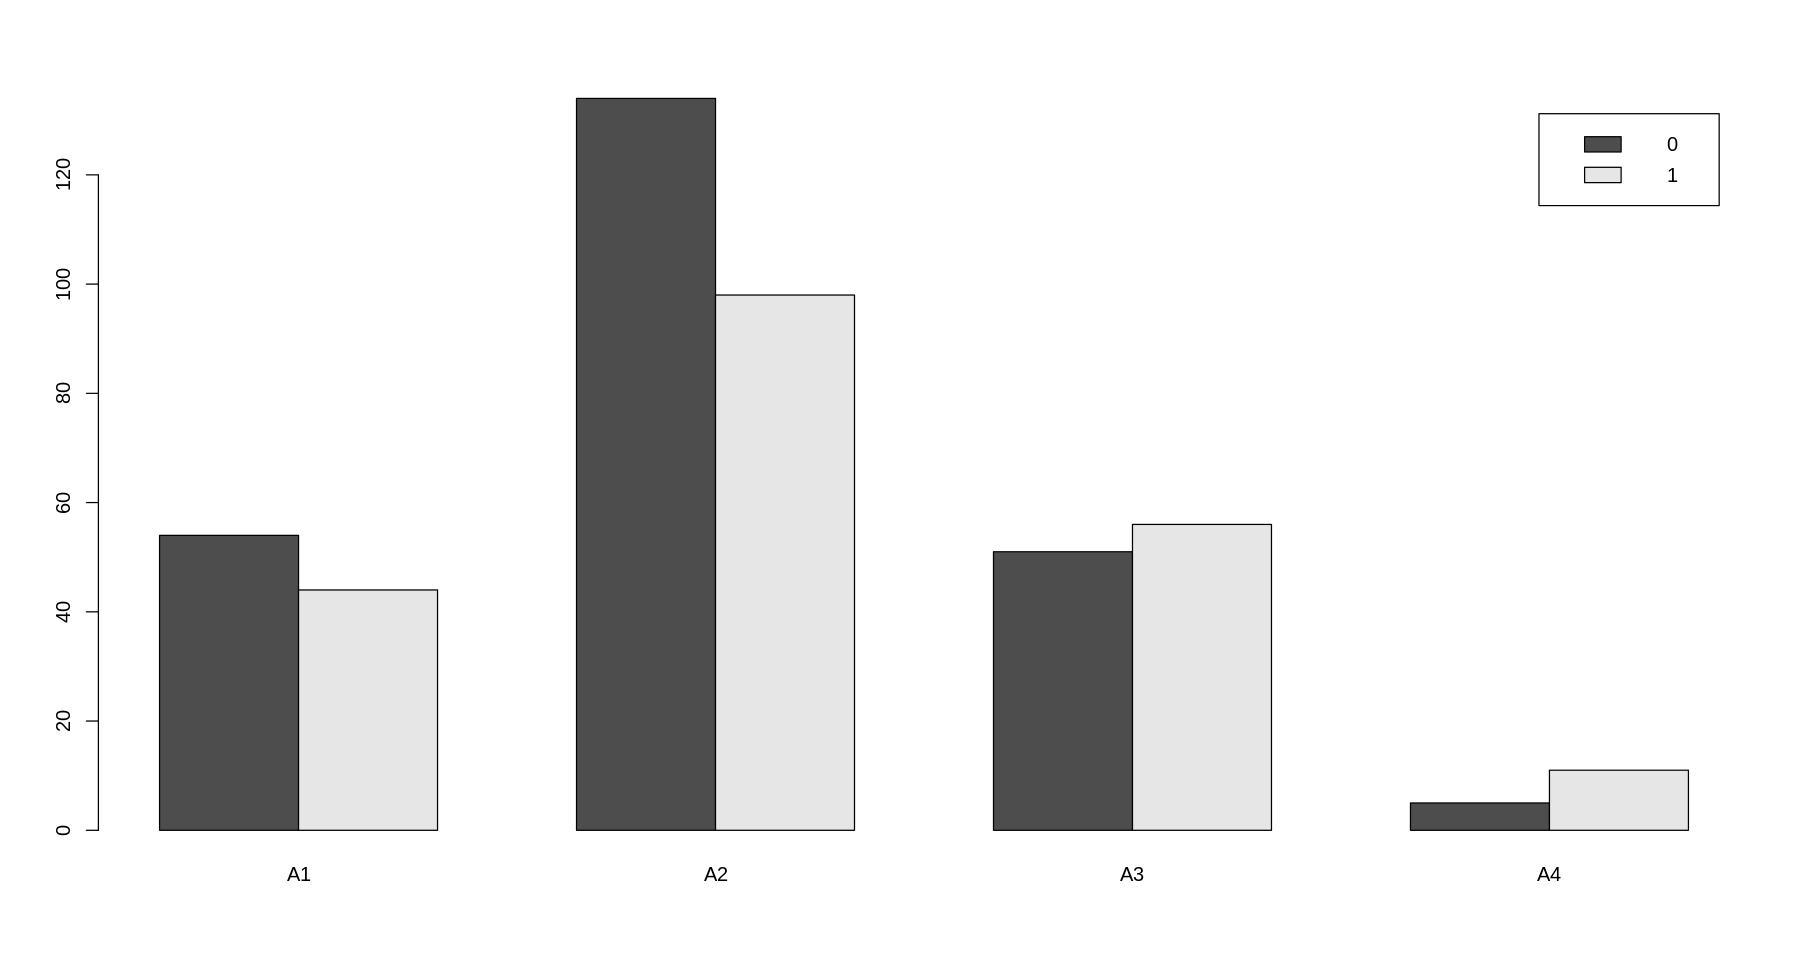

In [78]:
barplot(t(AgeHomeless), beside = TRUE,   
        legend.text = TRUE)

In [85]:
(sum.col <- apply(AgeHomeless,2,sum))

0   1 
244 209

In [87]:
(freq_age_homeless <-sweep(AgeHomeless,2,sum.col,'/'))

    
Age           0          1
  A1 0.22131148 0.21052632
  A2 0.54918033 0.46889952
  A3 0.20901639 0.26794258
  A4 0.02049180 0.05263158

In [90]:
chisq.test(AgeHomeless,correct = FALSE)


	Pearson's Chi-squared test

data:  AgeHomeless
X-squared = 6.4244, df = 3, p-value = 0.09269


In [93]:
a = c(13.9, 14.5, 13.8, 16.6, 18.2, 20.2, 13.6, 16.3, 15.4, 12.3) 
b = c(13.7, 14.6, 13.0, 16.2, 17.8, 21.0, 13.0, 16.9, 17.0, 12.1) 
q2.df <- data.frame(before = a, after = b)

In [94]:
summary(a)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.30   13.82   14.95   15.48   16.52   20.20 

In [95]:
summary(b)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.10   13.18   15.40   15.53   16.98   21.00 

In [96]:
difference = b-a

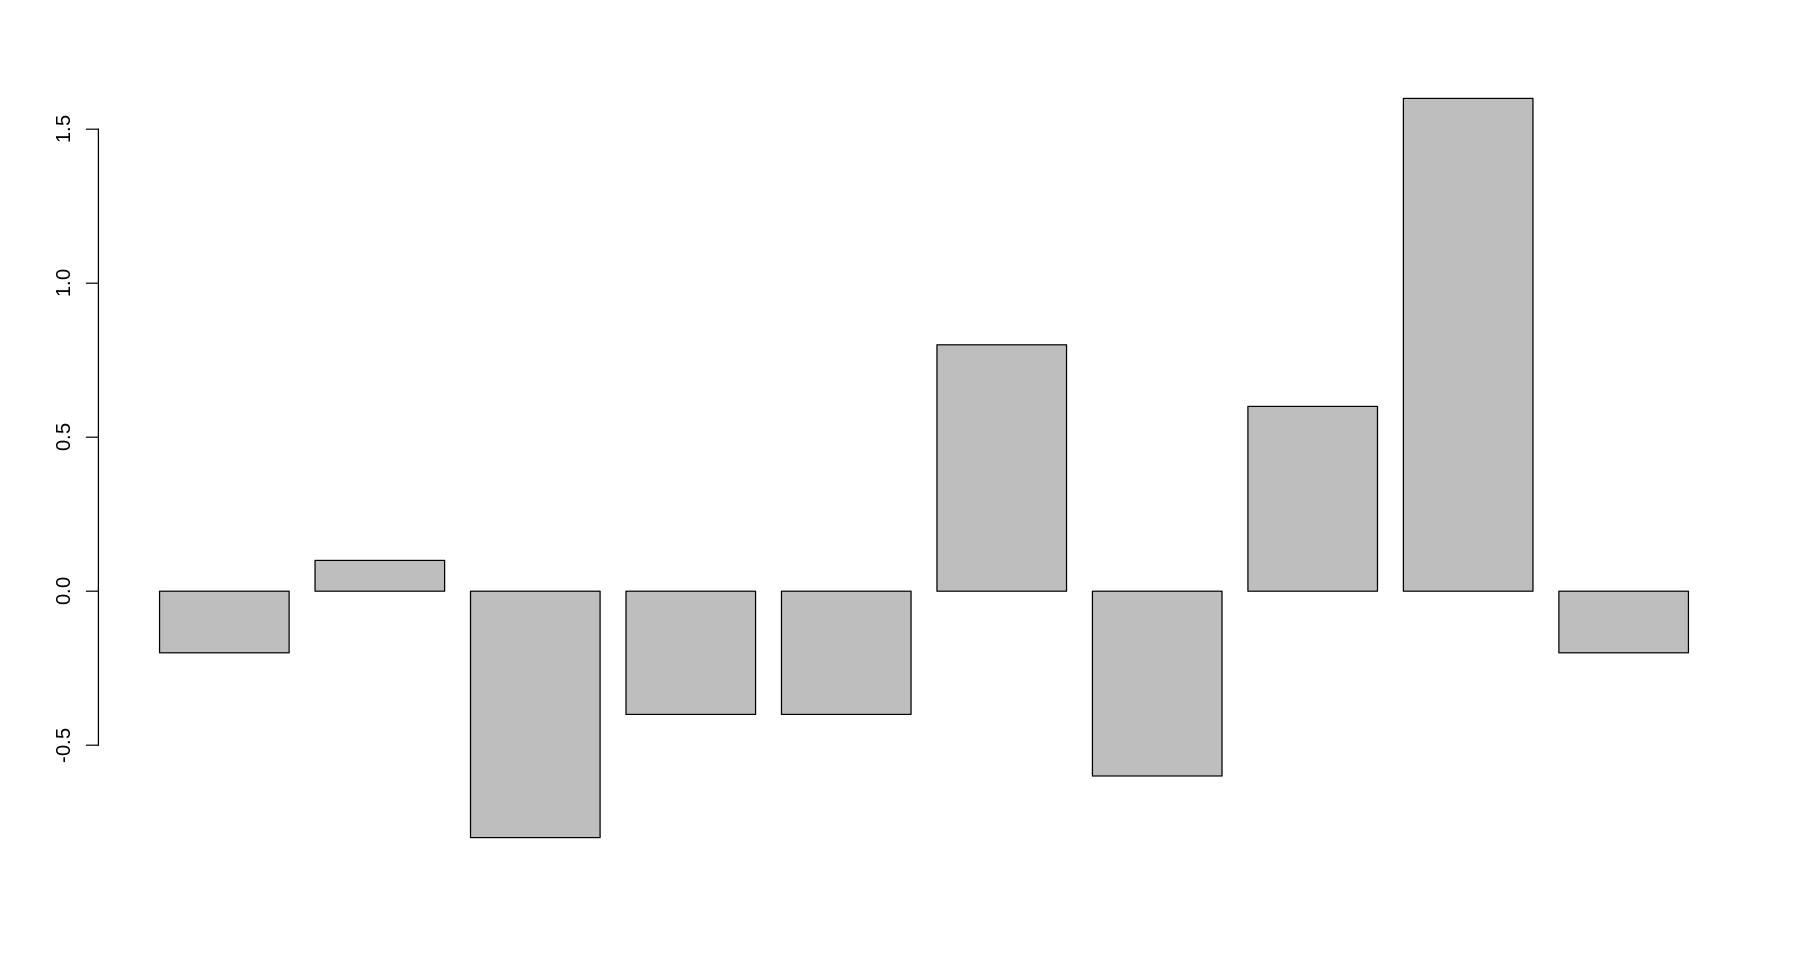

In [98]:
barplot(difference)

In [99]:
point(a,b)

ERROR: Error in point(a, b): could not find function "point"


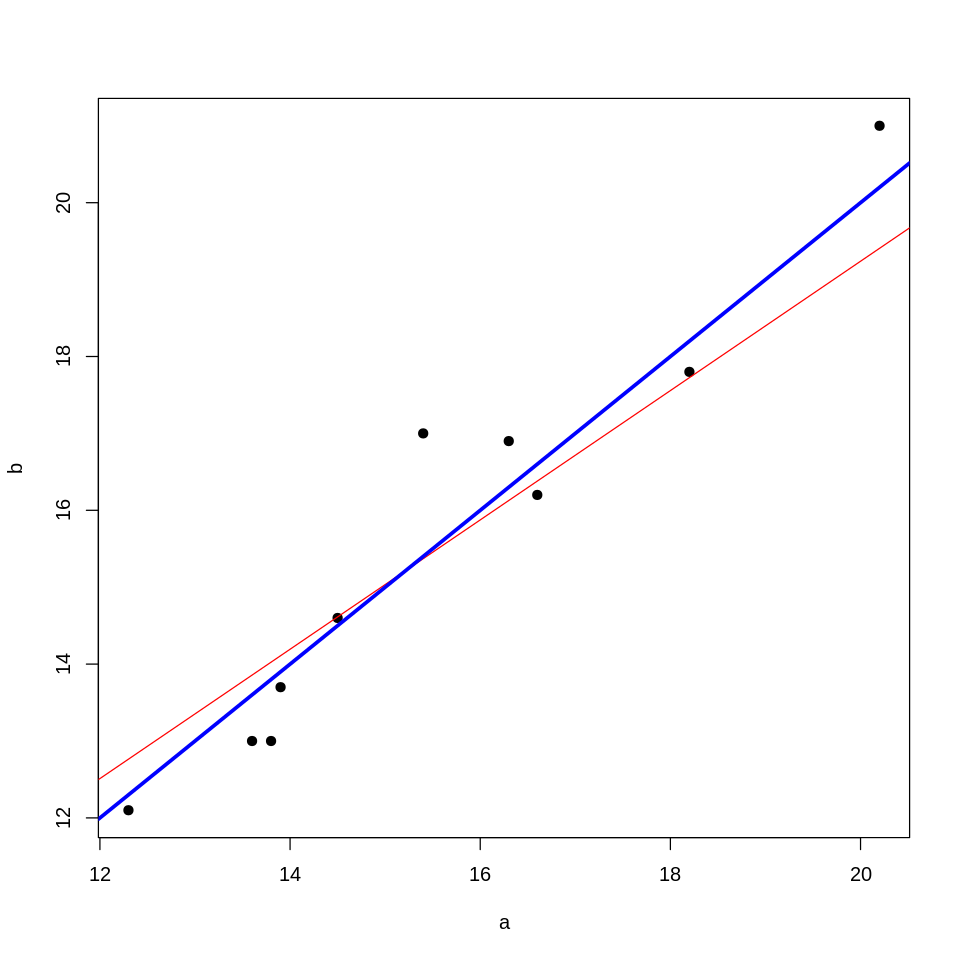

In [104]:
options(repr.plot.width=8, repr.plot.height=8)
plot(a, b, pch=19)
abline(lm(a~b), col="red") # regression line (y~x) oo
abline(a=0,b=1,col=4,lwd=3) 

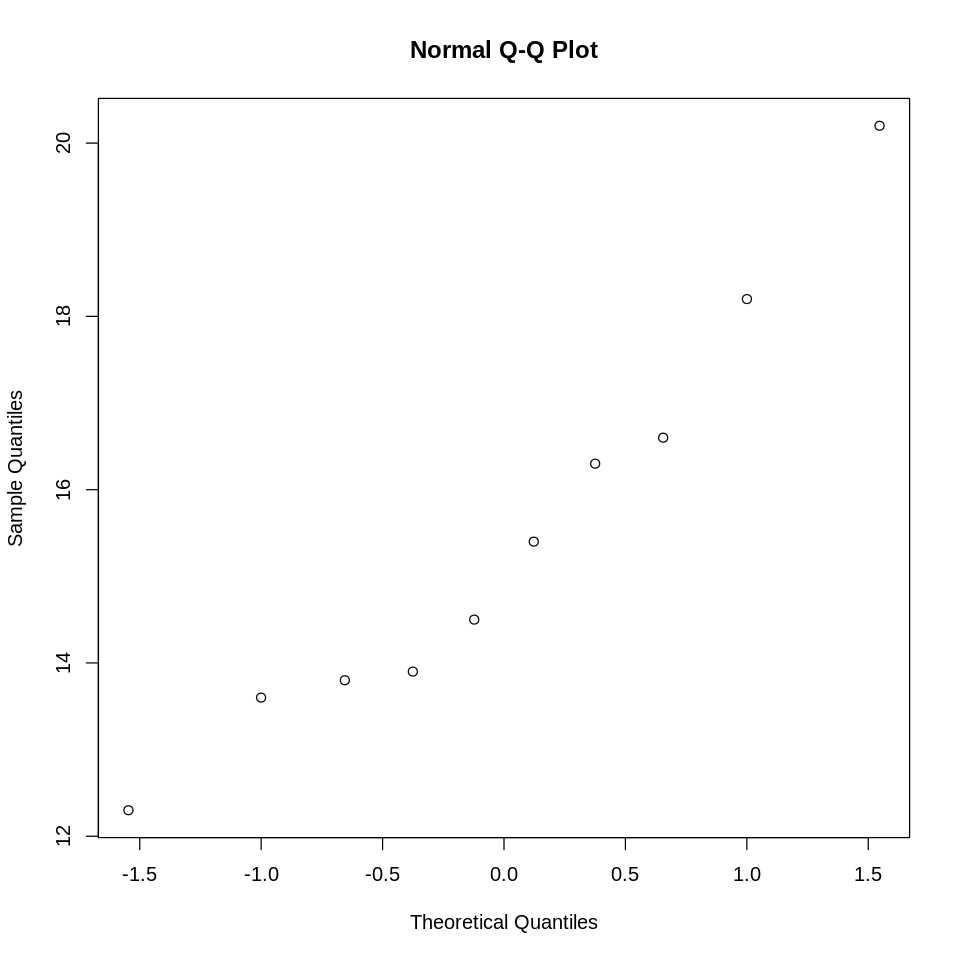

In [110]:
qqnorm(a)

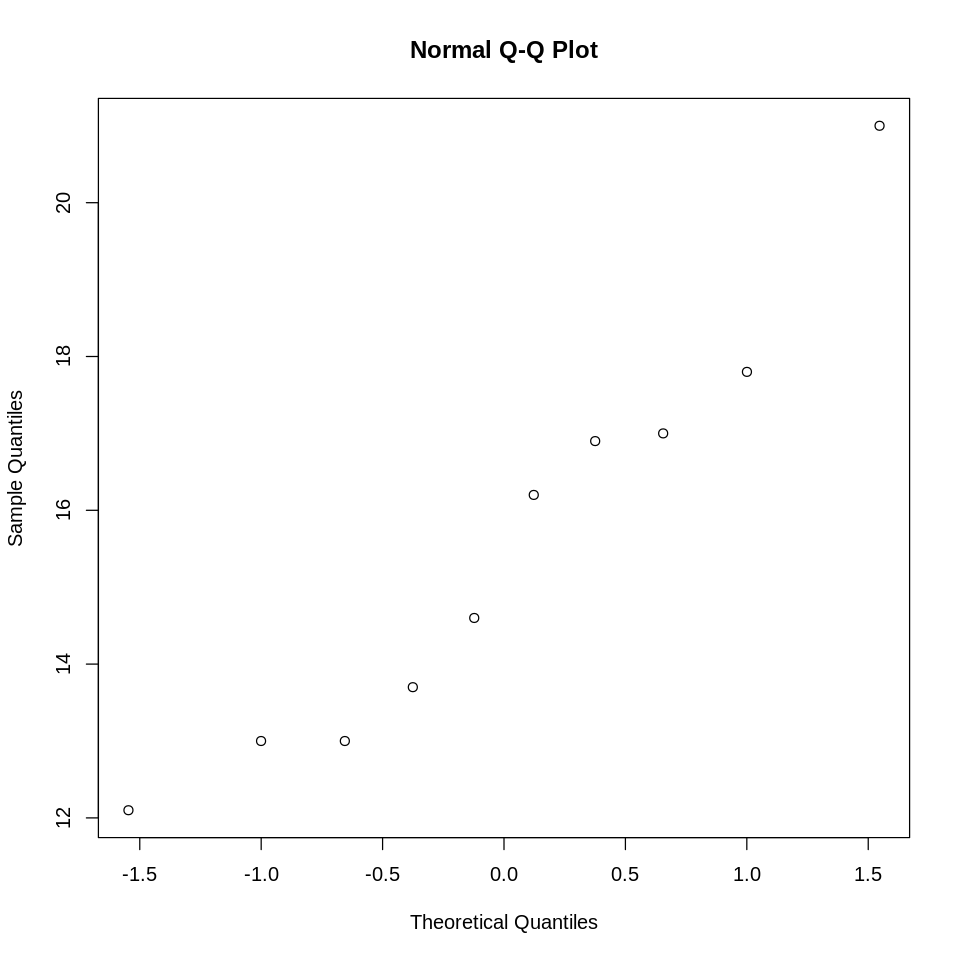

In [107]:
qqnorm(b)

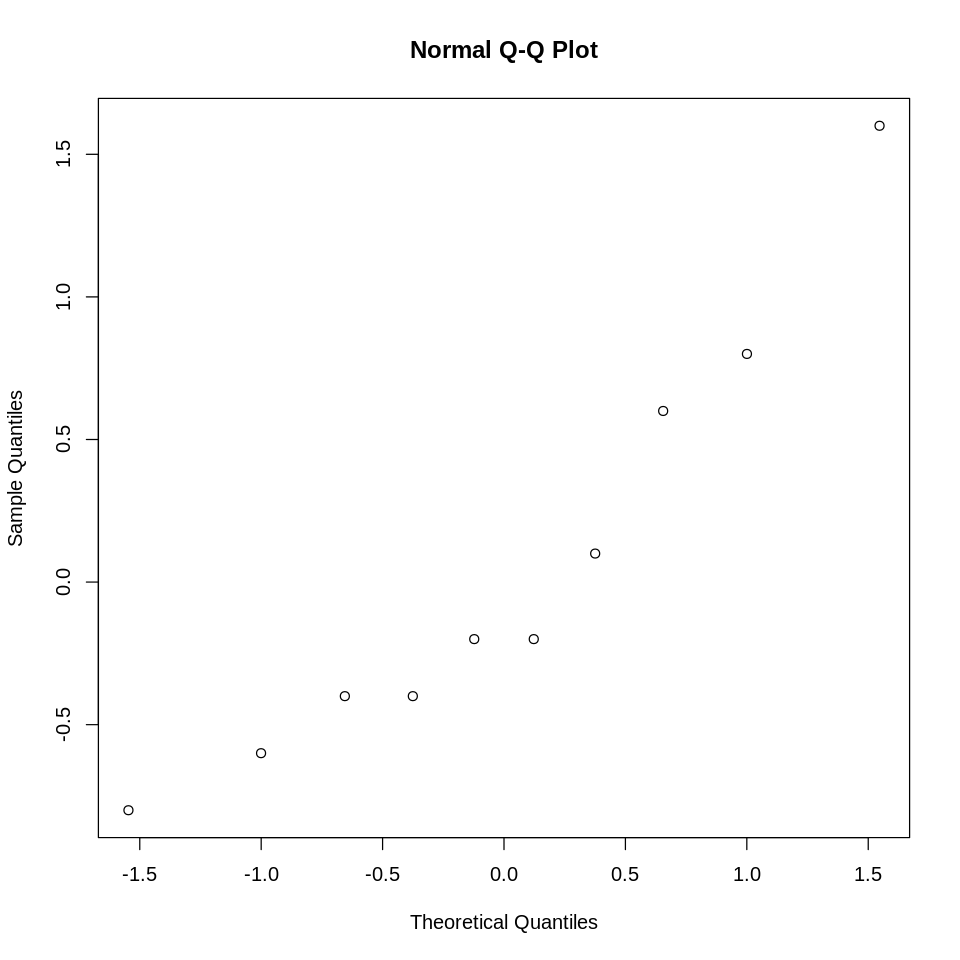

In [111]:
qqnorm(difference)

In [112]:
t.test(a, b,paired = TRUE)


	Paired t-test

data:  a and b
t = -0.21331, df = 9, p-value = 0.8358
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5802549  0.4802549
sample estimates:
mean of the differences 
                  -0.05 


In [113]:
wilcox.test(a,b,paired=TRUE)

Warning message in wilcox.test.default(a, b, paired = TRUE):
“cannot compute exact p-value with ties”



	Wilcoxon signed rank test with continuity correction

data:  a and b
V = 29.5, p-value = 0.8783
alternative hypothesis: true location shift is not equal to 0
